<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_practice/blob/main/3_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats

In [65]:
file = 'headbrain.csv'
data = pd.read_csv(file)
print(data.head(10),'\n')
print(f'The shape of data:{data.shape}''\n')
print(f'The columns are : {data.columns}')


   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590
5       1          1             3585                 1300
6       1          1             3785                 1400
7       1          1             3559                 1255
8       1          1             3613                 1355
9       1          1             3982                 1375 

The shape of data:(237, 4)

The columns are : Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


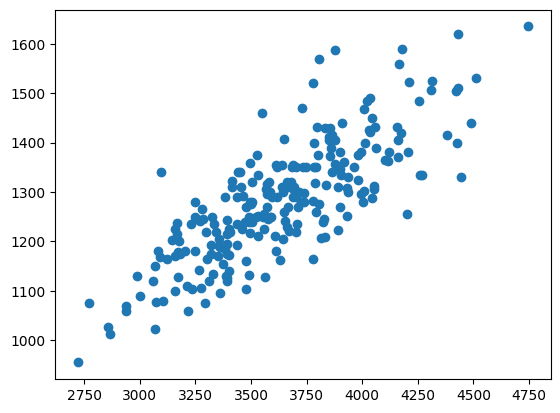

In [71]:
plt.scatter(data['Head Size(cm^3)'], data['Brain Weight(grams)'])
plt.show()


*   taking 'Head Size(cm^3)', 'Brain Weight(grams) as independent and dependent variables respectievely



In [67]:
x = sm.add_constant(data['Head Size(cm^3)'])
y = data['Brain Weight(grams)']

print(x)
print(y)


     const  Head Size(cm^3)
0      1.0             4512
1      1.0             3738
2      1.0             4261
3      1.0             3777
4      1.0             4177
..     ...              ...
232    1.0             3214
233    1.0             3394
234    1.0             3233
235    1.0             3352
236    1.0             3391

[237 rows x 2 columns]
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


In [68]:
train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    test_size = 0.8,
                                                    random_state = 100)

In [69]:
data_OLS = sm.OLS(train_y, train_x).fit()
data_OLS.params

,0
const,234.006063
Head Size(cm^3),0.284958




*  y = m*x + c
* Thus the model will be:
    * Brain Weight(grams) = 0.264378 * Head Size(cm^3) + 324.803207



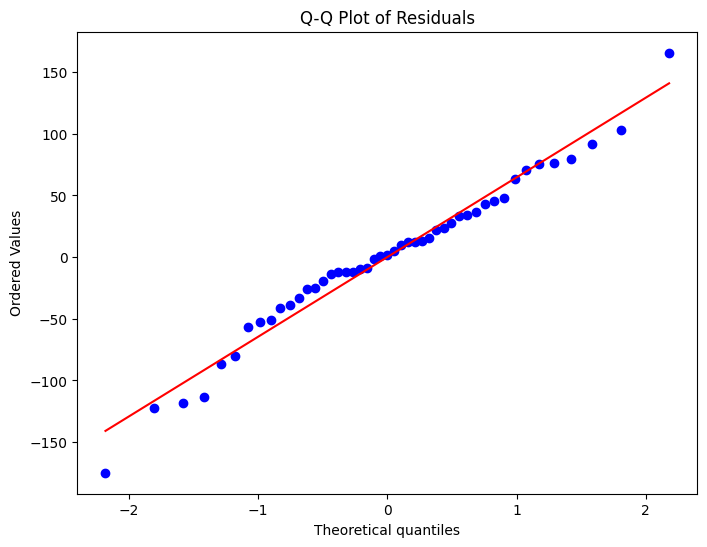

In [70]:

# Get residuals
data_OLS_resid = data_OLS.resid

# Create Q-Q plot using scipy (this works correctly!)
plt.figure(figsize=(8, 6))
stats.probplot(data_OLS_resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
#do neceesary corrections - next session